<a href="https://colab.research.google.com/github/krishgit042023/Spaceship-Titanic-Survival-Prediction/blob/main/Spaceship_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: import numpy pandas and matplotlib seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# prompt: load train dataset

dataset = pd.read_csv('/content/train.csv')

dataset.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


**CryoSleep** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

**Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

**Destination** - The planet the passenger will be debarking to.

**Age** - The age of the passenger.

**VIP** - Whether the passenger has paid for special VIP service during the voyage.

**RoomService, FoodCourt, ShoppingMall, Spa, VRDeck** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

**Name** - The first and last names of the passenger.

**Transported** - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [ ]:
dataset.shape

(8693, 14)

In [ ]:
dataset.isnull().sum()

,0
PassengerId,0
HomePlanet,201
CryoSleep,217
Cabin,199
Destination,182
Age,179
VIP,203
RoomService,181
FoodCourt,183
ShoppingMall,208


In [ ]:
print(dataset['CryoSleep'].value_counts())
print(dataset['CryoSleep'].isnull().sum())


CryoSleep
False    5439
True     3037
Name: count, dtype: int64
217


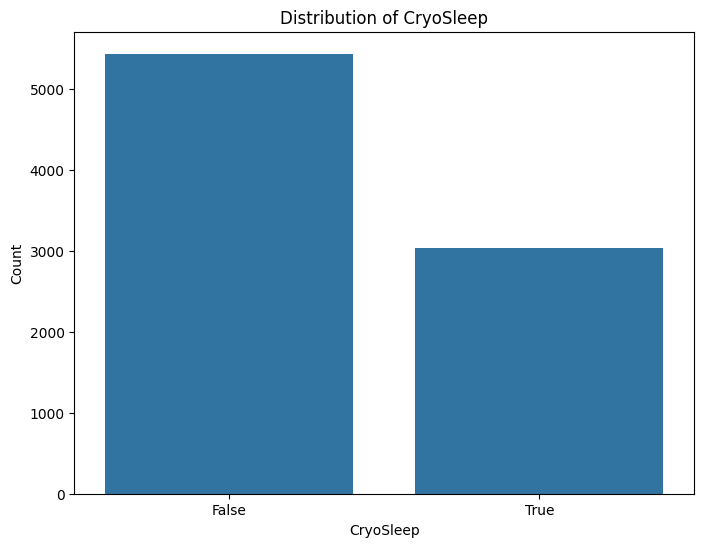

In [ ]:
# prompt: overall distribution of cryosleep

plt.figure(figsize=(8, 6))
sns.countplot(x='CryoSleep', data=dataset)
plt.title('Distribution of CryoSleep')
plt.xlabel('CryoSleep')
plt.ylabel('Count')
plt.show()

In [ ]:
# prompt: Check  cryosleep correlates with the target (Transported)

pd.crosstab(dataset['CryoSleep'], dataset['Transported'])

Transported,False,True
CryoSleep,,
False,3650,1789
True,554,2483


CryoSleep  Transported
False      False          67.107924
           True           32.892076
True       True           81.758314
           False          18.241686
Name: proportion, dtype: float64


<Figure size 800x600 with 0 Axes>

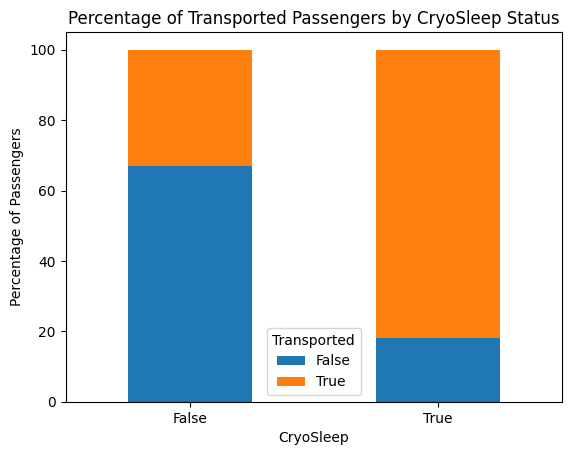

In [ ]:
# prompt: relation between cryosleep and target,, how much cryo sleep is dependent on target

# Calculate the percentage of transported passengers for each CryoSleep status
cryosleep_transported_percentage = dataset.groupby('CryoSleep')['Transported'].value_counts(normalize=True) * 100

# Print the results
print(cryosleep_transported_percentage)

# Visualize the relationship
plt.figure(figsize=(8, 6))
cryosleep_transported_percentage.unstack().plot(kind='bar', stacked=True)
plt.title('Percentage of Transported Passengers by CryoSleep Status')
plt.xlabel('CryoSleep')
plt.ylabel('Percentage of Passengers')
plt.xticks(rotation=0)
plt.legend(title='Transported')
plt.show()

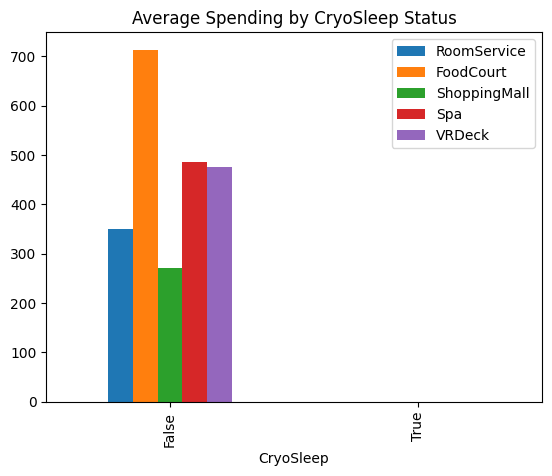

In [ ]:
spending_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
dataset.groupby('CryoSleep')[spending_cols].mean().plot(kind='bar')
plt.title('Average Spending by CryoSleep Status')
plt.show()


In [ ]:
# prompt: add these columns RoomService	FoodCourt	ShoppingMall	Spa	VRDeck   and name it as total_spending ( it will contain total spending of a passenger)

# Calculate total spending
dataset['total_spending'] = dataset['RoomService'] + dataset['FoodCourt'] + dataset['ShoppingMall'] + dataset['Spa'] + dataset['VRDeck']

In [ ]:
dataset.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,total_spending
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0


In [ ]:
# prompt: drop these four cols RoomService	FoodCourt	ShoppingMall	Spa	VRDeck

# Drop the specified columns
dataset = dataset.drop(['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], axis=1)

# Display the updated dataset
dataset.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Name,Transported,total_spending
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,Maham Ofracculy,False,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,Juanna Vines,True,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,Altark Susent,False,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,Solam Susent,False,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,Willy Santantines,True,1091.0


In [ ]:
# prompt: PassengerId	HomePlanet	CryoSleep	Cabin	Destination	Age	VIP total_spending	Name  transported   in this order make the dataset

import pandas as pd

# Assuming 'dataset' is the DataFrame from the provided code
# Create a list of columns in the desired order
new_column_order = ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'total_spending', 'Name', 'Transported']

# Reorder the columns in the DataFrame
dataset = dataset[new_column_order]

# Display the updated DataFrame
dataset.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,total_spending,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,736.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,10383.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,5176.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,1091.0,Willy Santantines,True


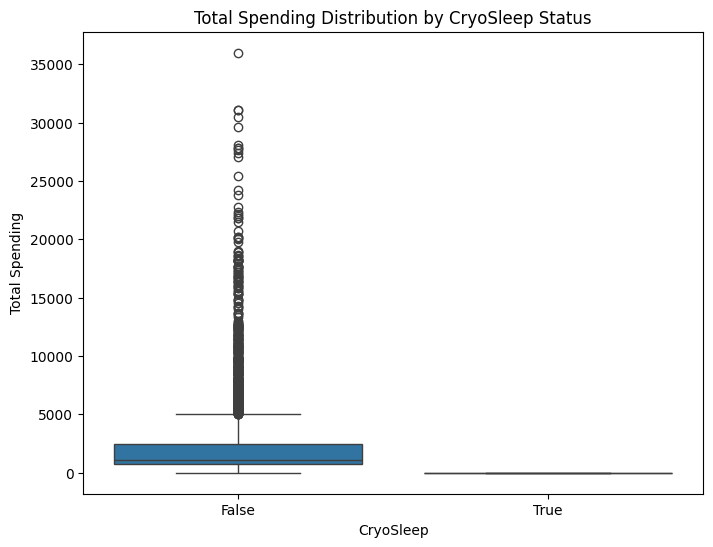

In [ ]:
# prompt: how cryo is related to total_spending

plt.figure(figsize=(8, 6))
sns.boxplot(x='CryoSleep', y='total_spending', data=dataset)
plt.title('Total Spending Distribution by CryoSleep Status')
plt.xlabel('CryoSleep')
plt.ylabel('Total Spending')
plt.show()

In [ ]:
# prompt: according to total spending check how many cryo sleep are true or false

# Calculate quartiles for total spending
quartiles = dataset['total_spending'].quantile([0.25, 0.5, 0.75])
Q1 = quartiles[0.25]
Q3 = quartiles[0.75]
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter data based on spending and CryoSleep status
low_spending_cryosleep = dataset[(dataset['total_spending'] <= lower_bound) & (dataset['CryoSleep'] == True)]
high_spending_cryosleep = dataset[(dataset['total_spending'] >= upper_bound) & (dataset['CryoSleep'] == True)]
low_spending_nocryosleep = dataset[(dataset['total_spending'] <= lower_bound) & (dataset['CryoSleep'] == False)]
high_spending_nocryosleep = dataset[(dataset['total_spending'] >= upper_bound) & (dataset['CryoSleep'] == False)]

# Count the number of passengers in each category
print("Number of passengers with CryoSleep = True and low spending:", len(low_spending_cryosleep))
print("Number of passengers with CryoSleep = True and high spending:", len(high_spending_cryosleep))
print("Number of passengers with CryoSleep = False and low spending:", len(low_spending_nocryosleep))
print("Number of passengers with CryoSleep = False and high spending:", len(high_spending_nocryosleep))

Number of passengers with CryoSleep = True and low spending: 0
Number of passengers with CryoSleep = True and high spending: 0
Number of passengers with CryoSleep = False and low spending: 0
Number of passengers with CryoSleep = False and high spending: 816


In [ ]:
# prompt: according to the values in total spending segregate the percentage of high spending and low spending

# Calculate the total number of passengers in each CryoSleep category
total_cryosleep = len(dataset[dataset['CryoSleep'] == True])
total_nocryosleep = len(dataset[dataset['CryoSleep'] == False])

# Calculate the percentage of high and low spenders within each CryoSleep category
percentage_high_spending_cryosleep = (len(high_spending_cryosleep) / total_cryosleep) * 100
percentage_low_spending_cryosleep = (len(low_spending_cryosleep) / total_cryosleep) * 100
percentage_high_spending_nocryosleep = (len(high_spending_nocryosleep) / total_nocryosleep) * 100
percentage_low_spending_nocryosleep = (len(low_spending_nocryosleep) / total_nocryosleep) * 100

# Print the results
print(f"Percentage of high spending passengers with CryoSleep: {percentage_high_spending_cryosleep:.2f}%")
print(f"Percentage of low spending passengers with CryoSleep: {percentage_low_spending_cryosleep:.2f}%")
print(f"Percentage of high spending passengers without CryoSleep: {percentage_high_spending_nocryosleep:.2f}%")
print(f"Percentage of low spending passengers without CryoSleep: {percentage_low_spending_nocryosleep:.2f}%")

Percentage of high spending passengers with CryoSleep: 0.00%
Percentage of low spending passengers with CryoSleep: 0.00%
Percentage of high spending passengers without CryoSleep: 15.00%
Percentage of low spending passengers without CryoSleep: 0.00%


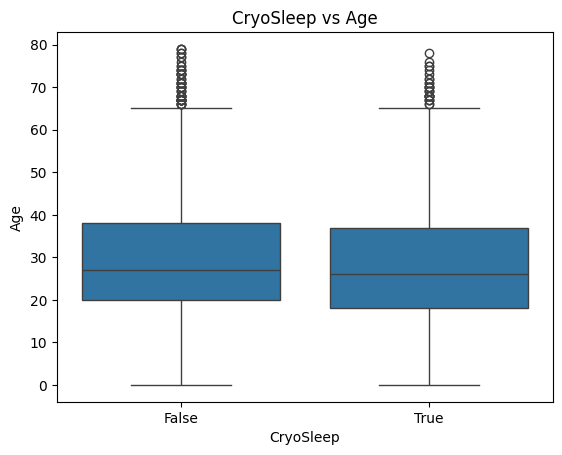

In [ ]:
sns.boxplot(data=dataset, x='CryoSleep', y='Age')
plt.title('CryoSleep vs Age')
plt.show()


VIP        False  True 
CryoSleep              
False       5143    175
True        2941     21
CryoSleep  VIP  
False      False    96.709289
           True      3.290711
True       False    99.291020
           True      0.708980
Name: proportion, dtype: float64


<Figure size 800x600 with 0 Axes>

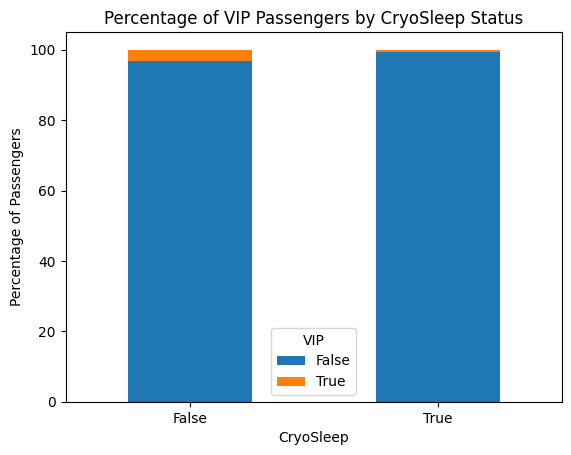

In [ ]:
# prompt: ralation between cryosleep and vip

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'dataset' as in the provided code

# Create a cross-tabulation of CryoSleep and VIP
cryosleep_vip_crosstab = pd.crosstab(dataset['CryoSleep'], dataset['VIP'])

# Print the cross-tabulation
print(cryosleep_vip_crosstab)

# Calculate the percentage of VIP passengers for each CryoSleep status
vip_percentage = dataset.groupby('CryoSleep')['VIP'].value_counts(normalize=True) * 100
print(vip_percentage)

# Visualize the relationship using a bar plot
plt.figure(figsize=(8, 6))
vip_percentage.unstack().plot(kind='bar', stacked=True)
plt.title('Percentage of VIP Passengers by CryoSleep Status')
plt.xlabel('CryoSleep')
plt.ylabel('Percentage of Passengers')
plt.xticks(rotation=0)
plt.legend(title='VIP')
plt.show()

In [ ]:
# prompt: fill the null values in cyrosleep column by false , the most occurred value

# Fill missing values in 'CryoSleep' with the most frequent value (False)
dataset['CryoSleep'].fillna(False, inplace=True)

<ipython-input-19-2f4d09239295>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['CryoSleep'].fillna(False, inplace=True)
<ipython-input-19-2f4d09239295>:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['CryoSleep'].fillna(False, inplace=True)


In [ ]:
dataset.isnull().sum()

,0
PassengerId,0
HomePlanet,201
CryoSleep,0
Cabin,199
Destination,182
Age,179
VIP,203
total_spending,908
Name,200
Transported,0


In [ ]:
# prompt: find the mean and median of age

# Calculate the mean and median of the 'Age' column
mean_age = dataset['Age'].mean()
median_age = dataset['Age'].median()

print(f"Mean Age: {mean_age}")
print(f"Median Age: {median_age}")

Mean Age: 28.82793046746535
Median Age: 27.0


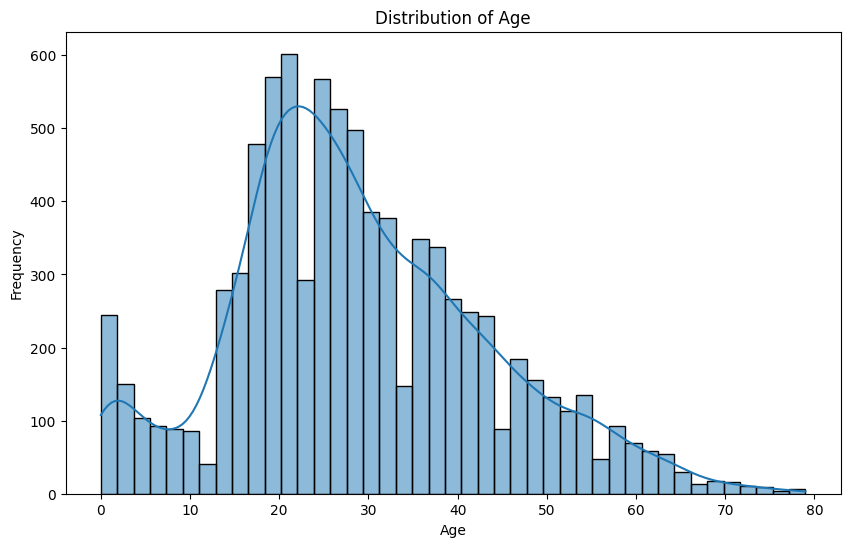

In [ ]:
# prompt: find the normal distribution of age

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'dataset' is your DataFrame as defined in the previous code

plt.figure(figsize=(10, 6))
sns.histplot(dataset['Age'], kde=True)  # kde=True adds a kernel density estimate
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# prompt: what is the age corresponds to highest frequency

# Assuming 'dataset' is your DataFrame as defined in the previous code

# Calculate the frequency of each age
age_counts = dataset['Age'].value_counts()

# Find the age with the highest frequency
age_with_highest_frequency = age_counts.index[0]

print(f"The age with the highest frequency is: {age_with_highest_frequency}")

The age with the highest frequency is: 24.0


In [ ]:
# prompt: fill the missing values in age column with highest frequency value from the distribution curve

# Fill missing 'Age' values with the most frequent age
dataset['Age'].fillna(age_with_highest_frequency, inplace=True)

# Verify that there are no more missing values in 'Age'
print(dataset['Age'].isnull().sum())

0


<ipython-input-24-19790ac911a6>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Age'].fillna(age_with_highest_frequency, inplace=True)


In [ ]:
dataset.isnull().sum()

,0
PassengerId,0
HomePlanet,201
CryoSleep,0
Cabin,199
Destination,182
Age,0
VIP,203
total_spending,908
Name,200
Transported,0


In [ ]:
# prompt: replace the nan values in total_spending by 0 (zero)

# Replace NaN values in 'total_spending' with 0
dataset['total_spending'].fillna(0, inplace=True)

<ipython-input-26-e1b8c4b27171>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['total_spending'].fillna(0, inplace=True)


In [ ]:
dataset.isnull().sum()

,0
PassengerId,0
HomePlanet,201
CryoSleep,0
Cabin,199
Destination,182
Age,0
VIP,203
total_spending,0
Name,200
Transported,0


In [ ]:
# prompt: count of vip column

# Assuming your DataFrame is named 'dataset' as in the provided code

# Count the occurrences of each value in the 'VIP' column
vip_counts = dataset['VIP'].value_counts()

# Print the counts
vip_counts

,count
VIP,
False,8291
True,199


In [ ]:
# prompt: show the total spendings of the vip counts

# Assuming your DataFrame is named 'dataset' as in the provided code

# Group by 'VIP' and sum 'total_spending'
vip_spending = dataset.groupby('VIP')['total_spending'].sum()

# Print the total spending for each VIP group
vip_spending

,total_spending
VIP,
False,10471573.0
True,823353.0


In [ ]:
# prompt: replace the nan value in vip column by false

# Replace NaN values in the 'VIP' column with False
dataset['VIP'].fillna(False, inplace=True)

<ipython-input-30-3c37bbb7c4c5>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['VIP'].fillna(False, inplace=True)
<ipython-input-30-3c37bbb7c4c5>:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['VIP'].fillna(False, inplace=True)


In [ ]:
dataset.isnull().sum()

,0
PassengerId,0
HomePlanet,201
CryoSleep,0
Cabin,199
Destination,182
Age,0
VIP,0
total_spending,0
Name,200
Transported,0


In [ ]:
# prompt: count of home planet column

print(dataset['HomePlanet'].value_counts())

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64


In [ ]:
# prompt: replace the missing values in home planet column by unknown

# Replace missing values in 'HomePlanet' with 'Unknown'
dataset['HomePlanet'].fillna('Unknown', inplace=True)
dataset.isnull().sum()

<ipython-input-33-6293ca9d3430>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['HomePlanet'].fillna('Unknown', inplace=True)


,0
PassengerId,0
HomePlanet,0
CryoSleep,0
Cabin,199
Destination,182
Age,0
VIP,0
total_spending,0
Name,200
Transported,0


In [ ]:
# prompt: count of home planet column

print(dataset['HomePlanet'].value_counts())

HomePlanet
Earth      4602
Europa     2131
Mars       1759
Unknown     201
Name: count, dtype: int64


In [ ]:
# prompt: apply  label encoding to the categories of  home planet column

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder on the 'HomePlanet' column
label_encoder.fit(dataset['HomePlanet'])

# Transform the 'HomePlanet' column using the fitted encoder
dataset['HomePlanet'] = label_encoder.transform(dataset['HomePlanet'])

# Print the updated dataset to verify the changes
print(dataset['HomePlanet'].value_counts())

HomePlanet
0    4602
1    2131
2    1759
3     201
Name: count, dtype: int64


In [ ]:
dataset.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,total_spending,Name,Transported
0,0001_01,1,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,Maham Ofracculy,False
1,0002_01,0,False,F/0/S,TRAPPIST-1e,24.0,False,736.0,Juanna Vines,True
2,0003_01,1,False,A/0/S,TRAPPIST-1e,58.0,True,10383.0,Altark Susent,False
3,0003_02,1,False,A/0/S,TRAPPIST-1e,33.0,False,5176.0,Solam Susent,False
4,0004_01,0,False,F/1/S,TRAPPIST-1e,16.0,False,1091.0,Willy Santantines,True


In [ ]:
dataset.isnull().sum()

,0
PassengerId,0
HomePlanet,0
CryoSleep,0
Cabin,199
Destination,182
Age,0
VIP,0
total_spending,0
Name,200
Transported,0


In [ ]:
# prompt: value count of destination

print(dataset['Destination'].value_counts())

Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64


In [ ]:
# prompt: show transported and not transported with respect to value count of destination

# Assuming 'dataset' is your DataFrame as defined in the previous code

# Group by 'Destination' and 'Transported' and count the occurrences
destination_transported_counts = dataset.groupby(['Destination', 'Transported']).size().unstack(fill_value=0)

# Print the counts
destination_transported_counts

Transported,False,True
Destination,,
55 Cancri e,702,1098
PSO J318.5-22,395,401
TRAPPIST-1e,3128,2787


In [ ]:
# prompt: show one entire nan row in destination

# Assuming 'dataset' is your DataFrame as defined in the previous code

# Find rows where 'Destination' is NaN
nan_destination_rows = dataset[dataset['Destination'].isnull()]

# Display the first entire row with NaN in 'Destination'
if not nan_destination_rows.empty:
    print(nan_destination_rows.iloc[0])
else:
    print("No rows with NaN in 'Destination' column found.")

PassengerId          0045_02
HomePlanet                 2
CryoSleep               True
Cabin                 F/10/P
Destination              NaN
Age                     19.0
VIP                    False
total_spending           0.0
Name              Mass Chmad
Transported             True
Name: 47, dtype: object


In [ ]:
# prompt: replace the nan value in destination by most occurrence value in destination

# Find the most frequent value in 'Destination'
most_frequent_destination = dataset['Destination'].mode()[0]

# Replace NaN values in 'Destination' with the most frequent value
dataset['Destination'].fillna(most_frequent_destination, inplace=True)

<ipython-input-41-f35468848065>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Destination'].fillna(most_frequent_destination, inplace=True)


In [ ]:
# prompt: value count of destination

# Assuming 'dataset' is your DataFrame as defined in the previous code

# Count the occurrences of each value in the 'Destination' column
destination_counts = dataset['Destination'].value_counts()

# Print the counts
destination_counts

,count
Destination,
TRAPPIST-1e,6097
55 Cancri e,1800
PSO J318.5-22,796


In [ ]:
# prompt: apply label encoding to destination column

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder on the 'Destination' column
label_encoder.fit(dataset['Destination'])

# Transform the 'Destination' column using the fitted encoder
dataset['Destination'] = label_encoder.transform(dataset['Destination'])

# Print the updated dataset to verify the changes
print(dataset['Destination'].value_counts())
dataset.head()

Destination
2    6097
0    1800
1     796
Name: count, dtype: int64


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,total_spending,Name,Transported
0,0001_01,1,False,B/0/P,2,39.0,False,0.0,Maham Ofracculy,False
1,0002_01,0,False,F/0/S,2,24.0,False,736.0,Juanna Vines,True
2,0003_01,1,False,A/0/S,2,58.0,True,10383.0,Altark Susent,False
3,0003_02,1,False,A/0/S,2,33.0,False,5176.0,Solam Susent,False
4,0004_01,0,False,F/1/S,2,16.0,False,1091.0,Willy Santantines,True


In [ ]:
# prompt: value count of cabin

print(dataset['Cabin'].value_counts())

Cabin
G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: count, Length: 6560, dtype: int64


Deck
F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: count, dtype: int64
Num
82      28
86      22
19      22
56      21
176     21
        ..
1644     1
1515     1
1639     1
1277     1
1894     1
Name: count, Length: 1817, dtype: int64
Side
S    4288
P    4206
Name: count, dtype: int64


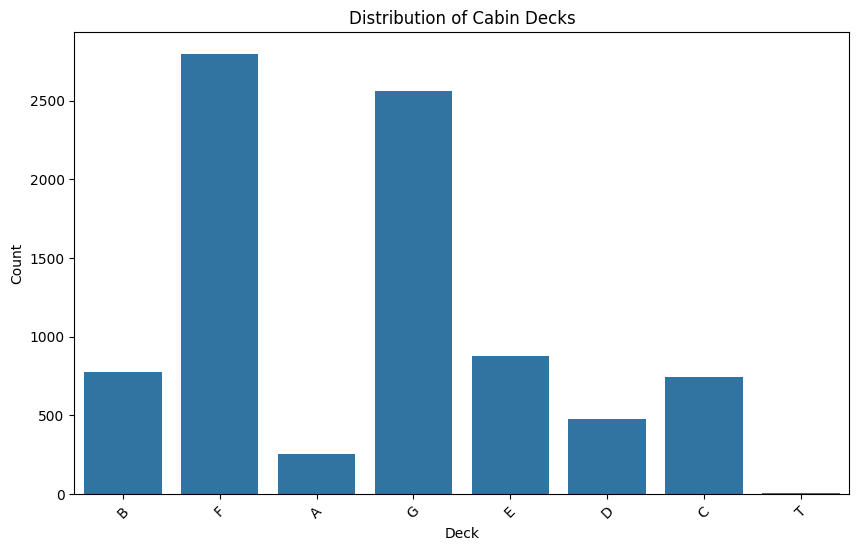

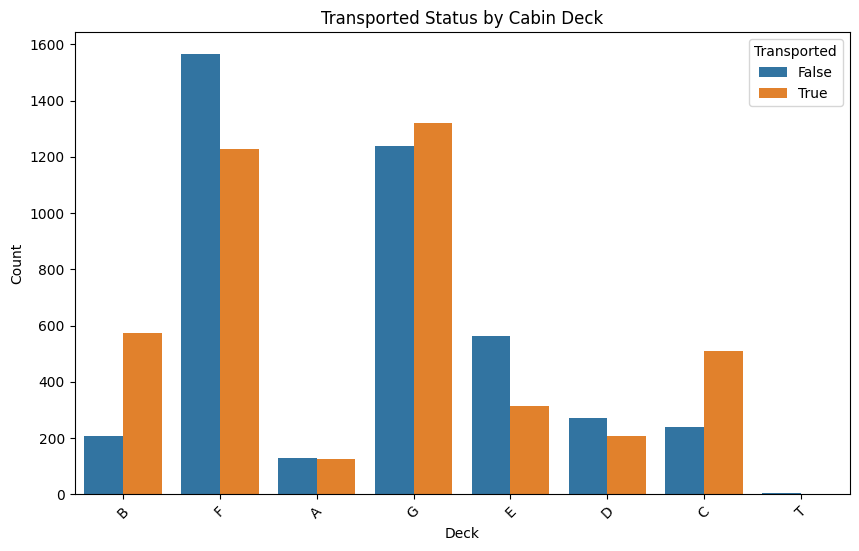

In [ ]:
# prompt: normal distribution of cabin value

# Assuming 'dataset' is your DataFrame as defined in the previous code

# Extract deck, num, and side from the 'Cabin' column
dataset[['Deck', 'Num', 'Side']] = dataset['Cabin'].str.split('/', expand=True)

# Print some info
print(dataset['Deck'].value_counts())
print(dataset['Num'].value_counts())
print(dataset['Side'].value_counts())

# Now you have separate 'Deck', 'Num', and 'Side' columns.
# You can explore and analyze these individually or in combination.

# Example: Plotting the distribution of 'Deck'
plt.figure(figsize=(10, 6))
sns.countplot(x='Deck', data=dataset)
plt.title('Distribution of Cabin Decks')
plt.xlabel('Deck')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Example: Visualizing the relationship between 'Deck' and 'Transported'
plt.figure(figsize=(10, 6))
sns.countplot(x='Deck', hue='Transported', data=dataset)
plt.title('Transported Status by Cabin Deck')
plt.xlabel('Deck')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Print some info
print(dataset['Deck'].value_counts())
print(dataset['Num'].value_counts())
print(dataset['Side'].value_counts())

Deck
F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: count, dtype: int64
Num
82      28
86      22
19      22
56      21
176     21
        ..
1644     1
1515     1
1639     1
1277     1
1894     1
Name: count, Length: 1817, dtype: int64
Side
S    4288
P    4206
Name: count, dtype: int64


In [ ]:
# prompt: fix the nan values in cabin column

# Fill NaN values in 'Deck' with the most frequent value
most_frequent_deck = dataset['Deck'].mode()[0]
dataset['Deck'].fillna(most_frequent_deck, inplace=True)

# Fill NaN values in 'Side' with the most frequent value
most_frequent_side = dataset['Side'].mode()[0]
dataset['Side'].fillna(most_frequent_side, inplace=True)

# Convert 'Num' to numeric, coercing errors to NaN
dataset['Num'] = pd.to_numeric(dataset['Num'], errors='coerce')

# Fill NaN values in 'Num' with the median
median_num = dataset['Num'].median()
dataset['Num'].fillna(median_num, inplace=True)

# Now you have separate 'Deck', 'Num', and 'Side' columns with no NaN values.

# Convert 'Deck' and 'Side' to numerical using LabelEncoder
label_encoder = LabelEncoder()
dataset['Deck'] = label_encoder.fit_transform(dataset['Deck'])
dataset['Side'] = label_encoder.fit_transform(dataset['Side'])


<ipython-input-47-93f8b9179b61>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Deck'].fillna(most_frequent_deck, inplace=True)
<ipython-input-47-93f8b9179b61>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [ ]:
dataset.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,total_spending,Name,Transported,Deck,Num,Side
0,0001_01,1,False,B/0/P,2,39.0,False,0.0,Maham Ofracculy,False,1,0.0,0
1,0002_01,0,False,F/0/S,2,24.0,False,736.0,Juanna Vines,True,5,0.0,1
2,0003_01,1,False,A/0/S,2,58.0,True,10383.0,Altark Susent,False,0,0.0,1
3,0003_02,1,False,A/0/S,2,33.0,False,5176.0,Solam Susent,False,0,0.0,1
4,0004_01,0,False,F/1/S,2,16.0,False,1091.0,Willy Santantines,True,5,1.0,1


In [ ]:
# prompt: fill the nan values in cabin column by the most occurred value

# Find the most frequent value in the 'Cabin' column
most_frequent_cabin = dataset['Cabin'].mode()[0]

# Fill NaN values in 'Cabin' with the most frequent value
dataset['Cabin'].fillna(most_frequent_cabin, inplace=True)

<ipython-input-49-5ef6063b3eef>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Cabin'].fillna(most_frequent_cabin, inplace=True)


In [ ]:
dataset.isnull().sum()

,0
PassengerId,0
HomePlanet,0
CryoSleep,0
Cabin,0
Destination,0
Age,0
VIP,0
total_spending,0
Name,200
Transported,0


In [ ]:
# prompt: value count of cabin

print(dataset['Cabin'].value_counts())

Cabin
G/734/S     207
C/21/P        7
B/201/P       7
G/1368/P      7
E/13/S        7
           ... 
G/556/P       1
E/231/S       1
G/545/S       1
G/543/S       1
F/947/P       1
Name: count, Length: 6560, dtype: int64


In [ ]:
dataset.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,total_spending,Name,Transported,Deck,Num,Side
0,0001_01,1,False,B/0/P,2,39.0,False,0.0,Maham Ofracculy,False,1,0.0,0
1,0002_01,0,False,F/0/S,2,24.0,False,736.0,Juanna Vines,True,5,0.0,1
2,0003_01,1,False,A/0/S,2,58.0,True,10383.0,Altark Susent,False,0,0.0,1
3,0003_02,1,False,A/0/S,2,33.0,False,5176.0,Solam Susent,False,0,0.0,1
4,0004_01,0,False,F/1/S,2,16.0,False,1091.0,Willy Santantines,True,5,1.0,1


In [ ]:
# prompt: apply encoding to cabin column

# Assuming 'dataset' is your DataFrame as defined in the previous code

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder on the 'Cabin' column
label_encoder.fit(dataset['Cabin'])

# Transform the 'Cabin' column using the fitted encoder
dataset['Cabin'] = label_encoder.transform(dataset['Cabin'])

# Print the updated dataset to verify the changes
print(dataset['Cabin'].value_counts())
dataset.head()

Cabin
6156    207
764       7
312       7
5092      7
1454      7
       ... 
5892      1
1597      1
5876      1
5874      1
4479      1
Name: count, Length: 6560, dtype: int64


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,total_spending,Name,Transported,Deck,Num,Side
0,0001_01,1,False,149,2,39.0,False,0.0,Maham Ofracculy,False,1,0.0,0
1,0002_01,0,False,2184,2,24.0,False,736.0,Juanna Vines,True,5,0.0,1
2,0003_01,1,False,1,2,58.0,True,10383.0,Altark Susent,False,0,0.0,1
3,0003_02,1,False,1,2,33.0,False,5176.0,Solam Susent,False,0,0.0,1
4,0004_01,0,False,2186,2,16.0,False,1091.0,Willy Santantines,True,5,1.0,1


In [ ]:
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the 'CryoSleep' column
dataset['CryoSleep'] = label_encoder.fit_transform(dataset['CryoSleep'])

# Fit and transform the 'VIP' column
dataset['VIP'] = label_encoder.fit_transform(dataset['VIP'])

# Display the first few rows of the updated DataFrame
dataset.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,total_spending,Name,Transported,Deck,Num,Side
0,0001_01,1,0,149,2,39.0,0,0.0,Maham Ofracculy,False,1,0.0,0
1,0002_01,0,0,2184,2,24.0,0,736.0,Juanna Vines,True,5,0.0,1
2,0003_01,1,0,1,2,58.0,1,10383.0,Altark Susent,False,0,0.0,1
3,0003_02,1,0,1,2,33.0,0,5176.0,Solam Susent,False,0,0.0,1
4,0004_01,0,0,2186,2,16.0,0,1091.0,Willy Santantines,True,5,1.0,1


In [ ]:
# prompt: copy train dataset into another dataset and name it as dataset_1

dataset_1 = dataset.copy()

In [ ]:
# prompt: drop name , cabin column from train data

# Drop the 'Name' and 'Cabin' columns
dataset = dataset.drop(['Name', 'Cabin'], axis=1)

# Display the updated dataset
dataset.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,total_spending,Transported,Deck,Num,Side
0,0001_01,1,0,2,39.0,0,0.0,False,1,0.0,0
1,0002_01,0,0,2,24.0,0,736.0,True,5,0.0,1
2,0003_01,1,0,2,58.0,1,10383.0,False,0,0.0,1
3,0003_02,1,0,2,33.0,0,5176.0,False,0,0.0,1
4,0004_01,0,0,2,16.0,0,1091.0,True,5,1.0,1


In [ ]:
dataset.shape

(8693, 11)

In [ ]:
# prompt: split the dataset into train and test set dataset

from sklearn.model_selection import train_test_split

# Assuming 'dataset' is your DataFrame as defined in the previous code

# Separate features (X) and target (y)
X = dataset.drop('Transported', axis=1)
y = dataset['Transported']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # You can adjust test_size and random_state

# Now you have X_train, X_test, y_train, and y_test for your machine learning model
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6954, 10) (1739, 10) (6954,) (1739,)


In [ ]:
# prompt: apply feature scaling

from sklearn.preprocessing import MinMaxScaler

# Assuming X_train and X_test are defined as in your previous code

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Now X_train_scaled and X_test_scaled contain the scaled features

In [ ]:
# prompt: apply random forest classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, criterion = 'entropy', random_state=42) # You can adjust n_estimators and other hyperparameters

# Train the classifier on the scaled training data
rf_classifier.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred = rf_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Random Forest Classifier: {accuracy}")

Accuracy of Random Forest Classifier: 0.7372052903967797


In [ ]:
# prompt: apply XGBoost

!pip install xgboost

import xgboost as xgb

# Assuming X_train_scaled, y_train, X_test_scaled, and y_test are defined as in your previous code

# Create the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42) # You can adjust hyperparameters as needed

# Train the classifier
xgb_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_xgb = xgb_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy of XGBoost Classifier: {accuracy_xgb}")

Accuracy of XGBoost Classifier: 0.7412305922944221


In [ ]:
# prompt: apply hyperparameter to XGBoost classifier

# Assuming X_train_scaled, y_train, X_test_scaled, and y_test are defined as in your previous code

# Create the XGBoost classifier with hyperparameters
xgb_classifier = xgb.XGBClassifier(
    n_estimators=200,  # Increased number of trees
    max_depth=6,        # Maximum depth of each tree
    learning_rate=0.1, # Adjust the learning rate
    subsample=0.8,     # Fraction of samples used for fitting each tree
    colsample_bytree=0.8,# Fraction of features used for fitting each tree
    objective='binary:logistic', # Objective function for binary classification
    eval_metric='logloss',       # Evaluation metric
    random_state=42
)

# Train the classifier
xgb_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_xgb = xgb_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy of XGBoost Classifier with hyperparameter tuning: {accuracy_xgb}")

Accuracy of XGBoost Classifier with hyperparameter tuning: 0.7538815411155837


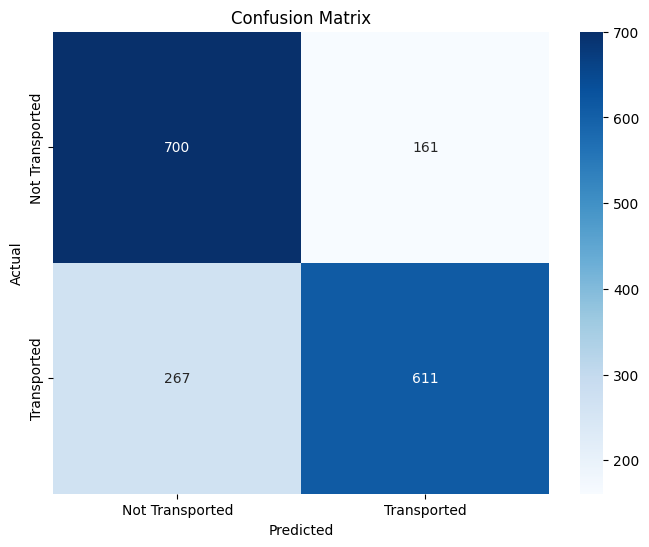

In [ ]:
# prompt: make the confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred_xgb are defined from the previous code
cm = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Transported', 'Transported'],
            yticklabels=['Not Transported', 'Transported'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# prompt: generate precision , recall , f1 score

from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming y_test and y_pred_xgb are defined from the previous code

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred_xgb)
recall = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


Precision: 0.7914507772020726
Recall: 0.6958997722095672
F1-score: 0.7406060606060606


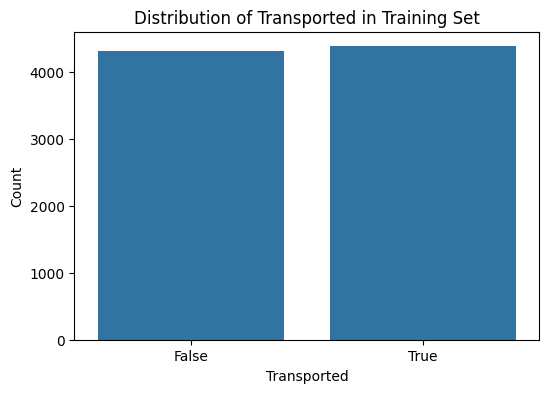

In [ ]:
# prompt: visualize the train set

# Assuming 'dataset' is your DataFrame as defined in the previous code
# Visualize the distribution of 'Transported' in the training set
plt.figure(figsize=(6, 4))
sns.countplot(x='Transported', data=dataset)
plt.title('Distribution of Transported in Training Set')
plt.xlabel('Transported')
plt.ylabel('Count')
plt.show()

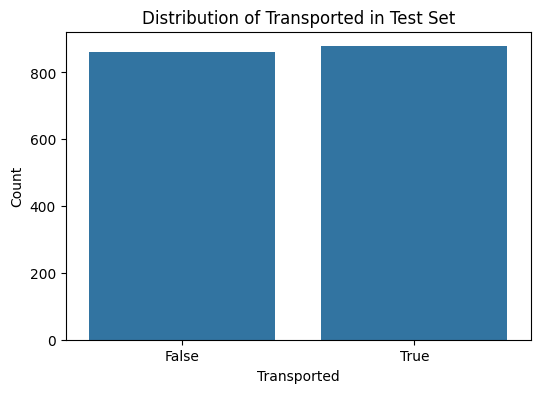

In [ ]:
# prompt: visualize the test set

# Assuming X_test and y_test are defined from the previous code
# Visualize the distribution of 'Transported' in the test set

plt.figure(figsize=(6, 4))
sns.countplot(x=y_test)
plt.title('Distribution of Transported in Test Set')
plt.xlabel('Transported')
plt.ylabel('Count')
plt.show()

**Test Data Operations**

In [ ]:
dataset_test = pd.read_csv('/content/test.csv')

dataset_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [ ]:
dataset_test.shape

(4277, 13)

In [ ]:
dataset_test.isnull().sum()

,0
PassengerId,0
HomePlanet,87
CryoSleep,93
Cabin,100
Destination,92
Age,91
VIP,93
RoomService,82
FoodCourt,106
ShoppingMall,98


In [ ]:
# prompt: apply the transformation , preprocessing to the test dataset that are applied on the train data

# Calculate total spending for test dataset
dataset_test['total_spending'] = dataset_test['RoomService'] + dataset_test['FoodCourt'] + dataset_test['ShoppingMall'] + dataset_test['Spa'] + dataset_test['VRDeck']

# Drop the original spending columns
dataset_test = dataset_test.drop(['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], axis=1)

# Reorder columns to match training data
new_column_order = ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'total_spending', 'Name']
dataset_test = dataset_test[new_column_order]

# Fill missing 'CryoSleep' values with the most frequent value (False) from the training data
dataset_test['CryoSleep'].fillna(False, inplace=True)

# Fill missing 'Age' values with the most frequent age from the training data
age_with_highest_frequency = dataset['Age'].value_counts().index[0]
dataset_test['Age'].fillna(age_with_highest_frequency, inplace=True)

<ipython-input-70-8101f7317d7e>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset_test['CryoSleep'].fillna(False, inplace=True)
<ipython-input-70-8101f7317d7e>:14: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset_test['CryoSleep'].fillna(False, inplace=True)
<ipython-input-70-8101f7317d7e>:18: Futu

In [ ]:
dataset_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,total_spending,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,2832.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,7418.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,645.0,Brence Harperez


In [ ]:
# prompt: replace nan in vip col by false

# Replace NaN values in the 'VIP' column with False
dataset_test['VIP'].fillna(False, inplace=True)

<ipython-input-72-0d001e5d400f>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset_test['VIP'].fillna(False, inplace=True)
<ipython-input-72-0d001e5d400f>:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset_test['VIP'].fillna(False, inplace=True)


In [ ]:
# prompt: replace nan in total_spending by zero in the test data

# Replace NaN values in 'total_spending' with 0 in the test dataset
dataset_test['total_spending'].fillna(0, inplace=True)

<ipython-input-73-04738afdc09a>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset_test['total_spending'].fillna(0, inplace=True)


In [ ]:
dataset_test.isnull().sum()

,0
PassengerId,0
HomePlanet,87
CryoSleep,0
Cabin,100
Destination,92
Age,0
VIP,0
total_spending,0
Name,94


In [ ]:
# prompt: pply  label encoding to the categories of  home planet column on the test data

# Replace missing values in 'HomePlanet' with 'Unknown'
dataset_test['HomePlanet'].fillna('Unknown', inplace=True)

# Create a LabelEncoder object (if not already created)
# Using the same label encoder fitted on the training data is crucial
# label_encoder = LabelEncoder() # Don't create a new one
# We already fitted label_encoder on the training data in the previous code

# Transform the 'HomePlanet' column using the fitted encoder from training data
dataset_test['HomePlanet'] = label_encoder.transform(dataset_test['HomePlanet'])

<ipython-input-75-62720d2c5904>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset_test['HomePlanet'].fillna('Unknown', inplace=True)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder on the 'HomePlanet' column
label_encoder.fit(dataset_test['HomePlanet'])

# Transform the 'HomePlanet' column using the fitted encoder
dataset_test['HomePlanet'] = label_encoder.transform(dataset_test['HomePlanet'])

# Print the updated dataset to verify the changes
print(dataset_test['HomePlanet'].value_counts())

HomePlanet
0    4277
Name: count, dtype: int64


In [ ]:
dataset_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,total_spending,Name
0,0013_01,0,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,Nelly Carsoning
1,0018_01,0,False,F/4/S,TRAPPIST-1e,19.0,False,2832.0,Lerome Peckers
2,0019_01,0,True,C/0/S,55 Cancri e,31.0,False,0.0,Sabih Unhearfus
3,0021_01,0,False,C/1/S,TRAPPIST-1e,38.0,False,7418.0,Meratz Caltilter
4,0023_01,0,False,F/5/S,TRAPPIST-1e,20.0,False,645.0,Brence Harperez


In [ ]:
# prompt: apply same operation on destination column of test data that is being done on the training data

# Find the most frequent value in 'Destination' in the test dataset
most_frequent_destination_test = dataset_test['Destination'].mode()[0]

# Replace NaN values in 'Destination' with the most frequent value from the training dataset
dataset_test['Destination'].fillna(most_frequent_destination_test, inplace=True)

<ipython-input-78-c01acd37cbc7>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset_test['Destination'].fillna(most_frequent_destination_test, inplace=True)


In [ ]:
dataset_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,total_spending,Name
0,0013_01,0,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,Nelly Carsoning
1,0018_01,0,False,F/4/S,TRAPPIST-1e,19.0,False,2832.0,Lerome Peckers
2,0019_01,0,True,C/0/S,55 Cancri e,31.0,False,0.0,Sabih Unhearfus
3,0021_01,0,False,C/1/S,TRAPPIST-1e,38.0,False,7418.0,Meratz Caltilter
4,0023_01,0,False,F/5/S,TRAPPIST-1e,20.0,False,645.0,Brence Harperez


In [ ]:
dataset_test.isnull().sum()

,0
PassengerId,0
HomePlanet,0
CryoSleep,0
Cabin,100
Destination,0
Age,0
VIP,0
total_spending,0
Name,94


In [ ]:
# prompt: value count on destination of dataset_test

print(dataset_test['Destination'].value_counts())

Destination
TRAPPIST-1e      3048
55 Cancri e       841
PSO J318.5-22     388
Name: count, dtype: int64


In [ ]:
# prompt: apply label encoding to destination of  dataset_test

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder on the 'Destination' column
label_encoder.fit(dataset_test['Destination'])

# Transform the 'Destination' column using the fitted encoder
dataset_test['Destination'] = label_encoder.transform(dataset_test['Destination'])

# Print the updated dataset to verify the changes
print(dataset_test['Destination'].value_counts())
dataset_test.head()

Destination
2    3048
0     841
1     388
Name: count, dtype: int64


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,total_spending,Name
0,0013_01,0,True,G/3/S,2,27.0,False,0.0,Nelly Carsoning
1,0018_01,0,False,F/4/S,2,19.0,False,2832.0,Lerome Peckers
2,0019_01,0,True,C/0/S,0,31.0,False,0.0,Sabih Unhearfus
3,0021_01,0,False,C/1/S,2,38.0,False,7418.0,Meratz Caltilter
4,0023_01,0,False,F/5/S,2,20.0,False,645.0,Brence Harperez


In [ ]:
# prompt: value count of cabin in dataset_test.head

print(dataset_test['Cabin'].value_counts())

Cabin
G/160/P     8
D/273/S     7
B/31/P      7
G/748/S     7
E/228/S     7
           ..
E/236/S     1
F/650/S     1
G/566/P     1
G/557/S     1
G/1498/S    1
Name: count, Length: 3265, dtype: int64


In [ ]:
# prompt: replace the nan values in cabin column by the most occurred value in the test dataset

# Find the most frequent value in 'Cabin' column in the test dataset
most_frequent_cabin_test = dataset_test['Cabin'].mode()[0]

# Replace NaN values in 'Cabin' column in the test dataset with the most frequent value
dataset_test['Cabin'].fillna(most_frequent_cabin_test, inplace=True)

<ipython-input-84-c7010ad662d4>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset_test['Cabin'].fillna(most_frequent_cabin_test, inplace=True)


In [ ]:
print(dataset_test['Cabin'].value_counts())

Cabin
G/160/P     108
G/748/S       7
E/228/S       7
D/273/S       7
B/31/P        7
           ... 
E/236/S       1
F/650/S       1
G/566/P       1
G/557/S       1
G/1498/S      1
Name: count, Length: 3265, dtype: int64


In [ ]:
dataset_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,total_spending,Name
0,0013_01,0,True,G/3/S,2,27.0,False,0.0,Nelly Carsoning
1,0018_01,0,False,F/4/S,2,19.0,False,2832.0,Lerome Peckers
2,0019_01,0,True,C/0/S,0,31.0,False,0.0,Sabih Unhearfus
3,0021_01,0,False,C/1/S,2,38.0,False,7418.0,Meratz Caltilter
4,0023_01,0,False,F/5/S,2,20.0,False,645.0,Brence Harperez


In [ ]:
# prompt: fix the nan values in cabin

# Assuming 'dataset' is your DataFrame as defined in the previous code

# Extract deck, num, and side from the 'Cabin' column in the test dataset
dataset_test[['Deck', 'Num', 'Side']] = dataset_test['Cabin'].str.split('/', expand=True)

# Fill NaN values in 'Deck' with the most frequent value from the training data
most_frequent_deck = dataset['Deck'].mode()[0]
dataset_test['Deck'].fillna(most_frequent_deck, inplace=True)

# Fill NaN values in 'Side' with the most frequent value from the training data
most_frequent_side = dataset['Side'].mode()[0]
dataset_test['Side'].fillna(most_frequent_side, inplace=True)

# Convert 'Num' to numeric, coercing errors to NaN
dataset_test['Num'] = pd.to_numeric(dataset_test['Num'], errors='coerce')

# Fill NaN values in 'Num' with the median from the training data
median_num = dataset['Num'].median()
dataset_test['Num'].fillna(median_num, inplace=True)

# Convert 'Deck' and 'Side' to numerical using LabelEncoder from training data
dataset_test['Deck'] = label_encoder.fit_transform(dataset_test['Deck'])
dataset_test['Side'] = label_encoder.fit_transform(dataset_test['Side'])

# Drop the 'Cabin' and 'Name' columns in the test dataset
dataset_test = dataset_test.drop(['Cabin', 'Name'], axis=1)

dataset_test.isnull().sum()

<ipython-input-87-da1c3531fca5>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset_test['Deck'].fillna(most_frequent_deck, inplace=True)
<ipython-input-87-da1c3531fca5>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

,0
PassengerId,0
HomePlanet,0
CryoSleep,0
Destination,0
Age,0
VIP,0
total_spending,0
Deck,0
Num,0
Side,0


In [ ]:
dataset_test.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,total_spending,Deck,Num,Side
0,0013_01,0,True,2,27.0,False,0.0,6,3,1
1,0018_01,0,False,2,19.0,False,2832.0,5,4,1
2,0019_01,0,True,0,31.0,False,0.0,2,0,1
3,0021_01,0,False,2,38.0,False,7418.0,2,1,1
4,0023_01,0,False,2,20.0,False,645.0,5,5,1


In [ ]:
# prompt: encode cryosleep and vip column

# Assuming 'dataset_test' is your DataFrame as defined in the previous code

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the 'CryoSleep' column
dataset_test['CryoSleep'] = label_encoder.fit_transform(dataset_test['CryoSleep'])

# Fit and transform the 'VIP' column
dataset_test['VIP'] = label_encoder.fit_transform(dataset_test['VIP'])

# Display the first few rows of the updated DataFrame
dataset_test.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,total_spending,Deck,Num,Side
0,0013_01,0,1,2,27.0,0,0.0,6,3,1
1,0018_01,0,0,2,19.0,0,2832.0,5,4,1
2,0019_01,0,1,0,31.0,0,0.0,2,0,1
3,0021_01,0,0,2,38.0,0,7418.0,2,1,1
4,0023_01,0,0,2,20.0,0,645.0,5,5,1


In [ ]:
dataset_test.shape

(4277, 10)

In [ ]:
# prompt: apply the newly tuned XGBoost model on the dataset_test and create the submission file

# Assuming xgb_classifier and scaler are defined from the previous code
# and dataset_test is preprocessed as shown in the previous code


# Scale the test data using the same scaler fitted on the training data
X_test_final_scaled = scaler.transform(dataset_test)

# Make predictions on the scaled test data
y_pred_final = xgb_classifier.predict(X_test_final_scaled)

# Create a submission DataFrame
submission = pd.DataFrame({'PassengerId': dataset_test['PassengerId'], 'Transported': y_pred_final})

# Convert boolean values to True/False strings
submission['Transported'] = submission['Transported'].astype(bool)

# Save the submission to a CSV file
submission.to_csv('submission.csv', index=False)

In [ ]:
submission.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,True


In [ ]:
# prompt: create a pickle file for model deployment

import pickle

# Assuming xgb_classifier and scaler are trained model and scaler


# Save the trained model to a pickle file
with open('xgb_model.pkl', 'wb') as file:
    pickle.dump(xgb_classifier, file)

# Save the scaler to a pickle file
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)